<a href="https://www.kaggle.com/code/yousseftarhri/morocco-deaths-causes?scriptVersionId=104644299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Libraries**
First of all I need to import **numpy** for the support of multi-dimensional arrays and matrices, **Pandas** for data processing, and **matplotlib** for data visualization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline


# **Dataset description**
We have two datasets, let's talk about the first one. 
The dataset describe the death numbers, and the causes in every year between 2007 and 2019, the source of this dataset https://ourworldindata.org/causes-of-death, it have 4 columns, Causes name, Causes Full Description, Death Numbers, Entity, Code, and Year.


In [2]:
df2= pd.read_csv('../input/causes-of-death-our-world-in-data/20222703 Causes Of Death Clean Output V2.0.csv')
df2.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007


# **Let's discover all causes that the dataset gives us.**
Here we want to know about this causes, so if you see below, you will find that there is **33 causes of death**.

In [3]:
causes = df2['Causes name'].unique()
causes

array(['Meningitis', 'Neoplasms', 'Fire, heat, and hot substances',
       'Malaria', 'Drowning', 'Interpersonal violence', 'HIV/AIDS',
       'Drug use disorders', 'Tuberculosis', 'Road injuries',
       'Maternal disorders', 'Lower respiratory infections',
       'Neonatal disorders', 'Alcohol use disorders',
       'Exposure to forces of nature', 'Diarrheal diseases',
       'Environmental heat and cold exposure', 'Nutritional deficiencies',
       'Self-harm', 'Conflict and terrorism', 'Diabetes mellitus',
       'Poisonings', 'Protein-energy malnutrition', 'Terrorism (deaths)',
       'Cardiovascular diseases', 'Chronic kidney disease',
       'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Acute hepatitis', "Alzheimer's disease and other dementias",
       "Parkinson's disease",
       'Number of executions (Amnesty International)'], dtype=object)

In [4]:
df2['Causes name'].describe()

count         201762
unique            33
top       Meningitis
freq            6114
Name: Causes name, dtype: object

# **Death causes in Morocco**
Our journey towards data visualization will here start. I'll concentrate for the time on **deaths in Morocco**.

In [5]:
data_morocco = df2.loc[df2['Entity'] == "Morocco"]
data_morocco.tail()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
119257,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,7422.0,Morocco,MAR,2019
119258,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,386.0,Morocco,MAR,2019
119259,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,4945.0,Morocco,MAR,2019
119260,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,1390.0,Morocco,MAR,2019
119261,Number of executions (Amnesty International),Deaths - Number of executions (Amnesty Interna...,NaN,Morocco,MAR,2019


# **Clean the dataset**
Here, I will drop all rows that have NaN.

In [6]:
data_morocco.dropna(inplace=True)
data_morocco.tail()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
119256,Cirrhosis and other chronic liver diseases,Deaths - Cirrhosis and other chronic liver dis...,4551.0,Morocco,MAR,2019
119257,Digestive diseases,Deaths - Digestive diseases - Sex: Both - Age:...,7422.0,Morocco,MAR,2019
119258,Acute hepatitis,Deaths - Acute hepatitis - Sex: Both - Age: Al...,386.0,Morocco,MAR,2019
119259,Alzheimer's disease and other dementias,Deaths - Alzheimer's disease and other dementi...,4945.0,Morocco,MAR,2019
119260,Parkinson's disease,Deaths - Parkinson's disease - Sex: Both - Age...,1390.0,Morocco,MAR,2019


In [7]:
num_death = data_morocco[['Death Numbers','Year']].groupby(['Year']).mean()

In [8]:
num_death.tail()

,Death Numbers
Year,
2015,6630.406250
2016,6900.806452
2017,6980.774194
2018,7066.806452
2019,7150.258065


Text(0.5, 1.0, 'Deaths in Morocco')

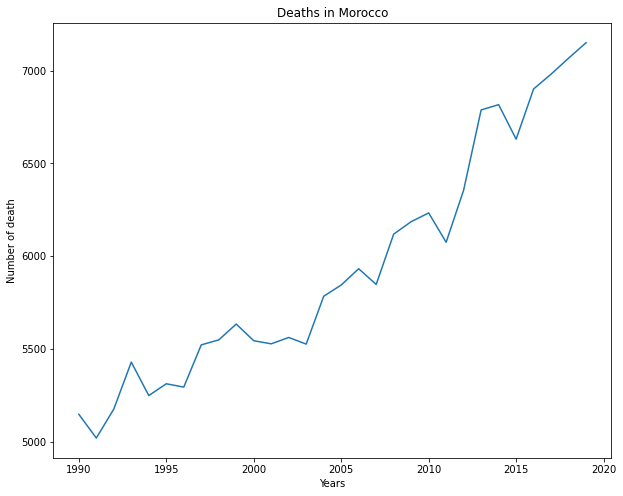

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))  # a figure with a single Axes
ax.plot(num_death['Death Numbers'])
ax.set_xlabel('Years') 
ax.set_ylabel('Number of death')  
ax.set_title("Deaths in Morocco") 

In [10]:
sum_death = data_morocco[['Causes name','Death Numbers']].groupby('Causes name').sum()
sum_death.head()

,Death Numbers
Causes name,
Acute hepatitis,15900.0
Alcohol use disorders,2745.0
Alzheimer's disease and other dementias,102231.0
Cardiovascular diseases,2551096.0
Chronic kidney disease,182577.0


In [11]:
sum_death.sort_values(by=['Death Numbers'],ascending=False)

,Death Numbers
Causes name,
Cardiovascular diseases,2551096.0
Neoplasms,543654.0
Neonatal disorders,400341.0
Road injuries,305148.0
Lower respiratory infections,252563.0
Chronic respiratory diseases,213543.0
Chronic kidney disease,182577.0
Digestive diseases,179607.0
Tuberculosis,168232.0


In [12]:
sum_death.index

Index(['Acute hepatitis', 'Alcohol use disorders',
       'Alzheimer's disease and other dementias', 'Cardiovascular diseases',
       'Chronic kidney disease', 'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Conflict and terrorism',
       'Diabetes mellitus', 'Diarrheal diseases', 'Digestive diseases',
       'Drowning', 'Drug use disorders',
       'Environmental heat and cold exposure', 'Exposure to forces of nature',
       'Fire, heat, and hot substances', 'HIV/AIDS', 'Interpersonal violence',
       'Lower respiratory infections', 'Malaria', 'Maternal disorders',
       'Meningitis', 'Neonatal disorders', 'Neoplasms',
       'Nutritional deficiencies', 'Parkinson's disease', 'Poisonings',
       'Protein-energy malnutrition', 'Road injuries', 'Self-harm',
       'Terrorism (deaths)', 'Tuberculosis'],
      dtype='object', name='Causes name')

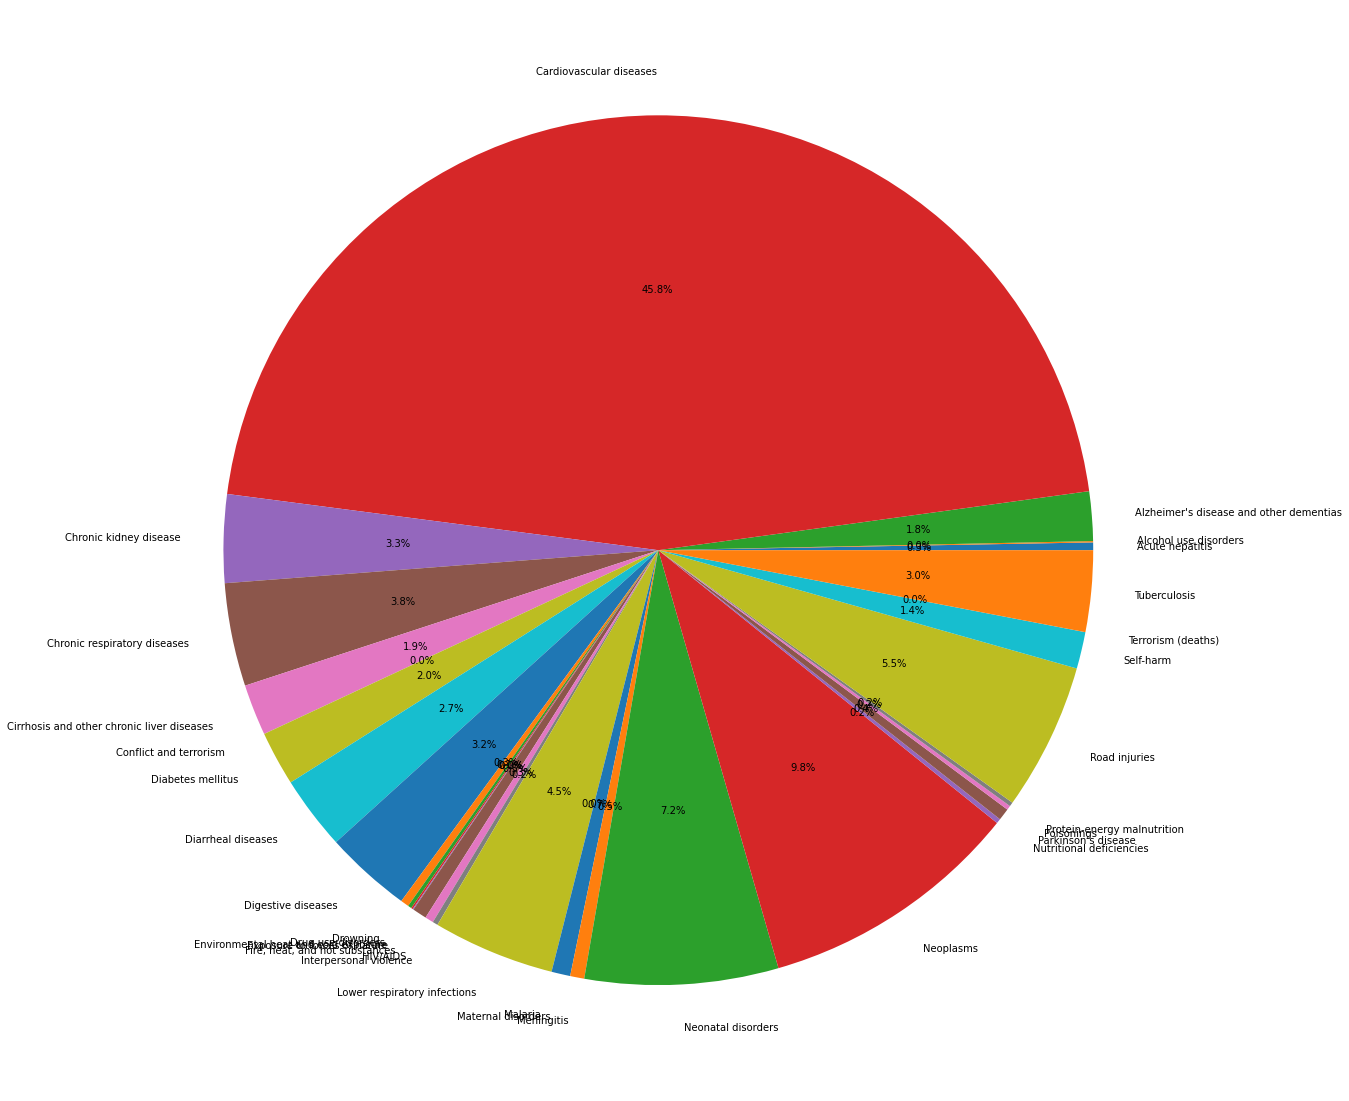

In [13]:
death = sum_death['Death Numbers']
plt.figure(figsize = (20,20))
plt.pie(death,labels = sum_death.index, autopct = '%1.1f%%')
plt.show()

<AxesSubplot:>

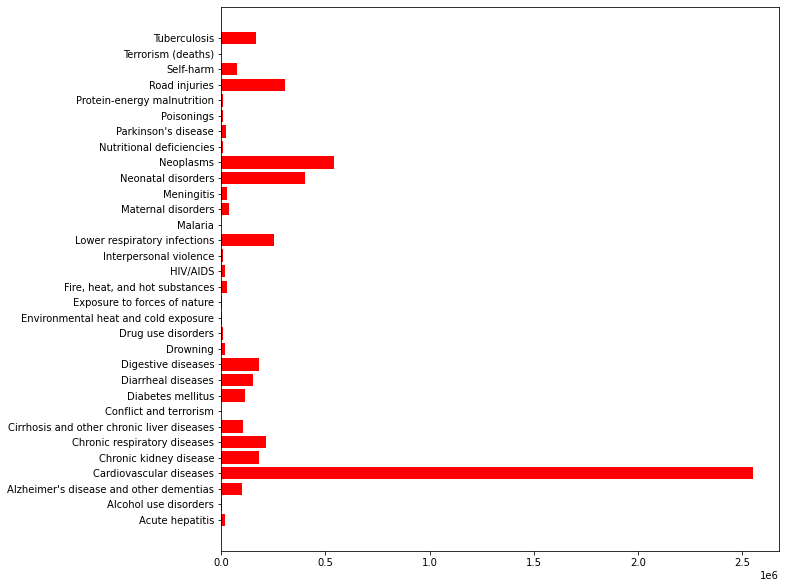

In [14]:
fig,ax =  plt.subplots(figsize = (10,10))
ax.barh(sum_death.index, death,color='red')
ax

# **Dataset 2**
We can see from this dataset how many people die in each country and what the different causes of death are.

In [15]:
df = pd.read_csv('../input/causes-of-death-our-world-in-data/20220327 annual-number-of-deaths-by-cause.csv')
df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,2007,15,2933.0,15925.0,481.0,393.0,2127.0,3657.0,...,2439.0,1199.0,53962.0,4490.0,7222.0,3346.0,6458.0,3437.0,1402.0,450.0
1,Afghanistan,AFG,2008,17,2731.0,16148.0,462.0,255.0,1973.0,3785.0,...,2231.0,1092.0,54051.0,4534.0,7143.0,3316.0,6408.0,3005.0,1424.0,455.0
2,Afghanistan,AFG,2009,0,2460.0,16383.0,448.0,239.0,1852.0,3874.0,...,1998.0,1065.0,53964.0,4597.0,7045.0,3291.0,6358.0,2663.0,1449.0,460.0
3,Afghanistan,AFG,2011,2,2327.0,17094.0,448.0,390.0,1775.0,4170.0,...,1805.0,1525.0,54347.0,4785.0,6916.0,3318.0,6370.0,2365.0,1508.0,473.0
4,Afghanistan,AFG,2012,14,2254.0,17522.0,445.0,94.0,1716.0,4245.0,...,1667.0,3521.0,54868.0,4846.0,6878.0,3353.0,6398.0,2264.0,1544.0,482.0


In [16]:
data_morocco2 = df.loc[df['Entity']=="Morocco"]
data_morocco2.head()

,Entity,Code,Year,Number of executions (Amnesty International),Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
4834,Morocco,MAR,1990,NaN,1586.0,11070.0,1032.0,0.0,690.0,142.0,...,437.0,NaN,57888.0,3551.0,4982.0,2733.0,4809.0,778.0,1888.0,404.0
4835,Morocco,MAR,1991,NaN,1514.0,11483.0,1028.0,0.0,673.0,143.0,...,414.0,3.0,59719.0,3679.0,5121.0,2784.0,4870.0,773.0,1965.0,423.0
4836,Morocco,MAR,1992,NaN,1486.0,12146.0,1105.0,0.0,749.0,162.0,...,412.0,2.0,62875.0,3881.0,5403.0,2910.0,5058.0,799.0,2041.0,451.0
4837,Morocco,MAR,1993,NaN,1447.0,12667.0,1126.0,0.0,754.0,177.0,...,398.0,NaN,65445.0,4029.0,5600.0,2981.0,5154.0,801.0,2115.0,475.0
4838,Morocco,MAR,1994,NaN,1400.0,12949.0,1122.0,0.0,743.0,198.0,...,391.0,0.0,66526.0,4121.0,5677.0,3008.0,5177.0,774.0,2187.0,490.0


In [17]:
data_morocco2=data_morocco2.drop(["Number of executions (Amnesty International)"],axis=1)
data_morocco2.dropna(inplace=True)
data_morocco2.tail()

,Entity,Code,Year,Deaths - Meningitis - Sex: Both - Age: All Ages (Number),Deaths - Neoplasms - Sex: Both - Age: All Ages (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)",Deaths - Malaria - Sex: Both - Age: All Ages (Number),Deaths - Drowning - Sex: Both - Age: All Ages (Number),Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number),Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number),...,Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number),Terrorism (deaths),Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number),Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number),Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number),Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number),Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number),Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number),Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)
4840,Morocco,MAR,1996,1337.0,13608.0,1119.0,0.0,727.0,262.0,308.0,...,362.0,0.0,69194.0,4356.0,5873.0,3076.0,5257.0,716.0,2349.0,526.0
4847,Morocco,MAR,2003,1072.0,16300.0,996.0,0.0,591.0,471.0,749.0,...,292.0,45.0,78456.0,5502.0,6690.0,3334.0,5703.0,485.0,3111.0,709.0
4851,Morocco,MAR,2007,857.0,18575.0,948.0,0.0,527.0,463.0,846.0,...,255.0,13.0,87876.0,6379.0,7397.0,3540.0,6056.0,434.0,3728.0,870.0
4855,Morocco,MAR,2011,674.0,20906.0,918.0,0.0,488.0,438.0,929.0,...,208.0,17.0,94564.0,7181.0,7853.0,3764.0,6371.0,393.0,4327.0,1008.0
4859,Morocco,MAR,2015,486.0,24665.0,863.0,0.0,415.0,385.0,728.0,...,197.0,0.0,109198.0,8542.0,8956.0,4236.0,7081.0,394.0,4700.0,1270.0


In [18]:
list(data_morocco2.keys())

['Entity',
 'Code',
 'Year',
 'Deaths - Meningitis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)',
 'Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)',
 'Deaths - Malaria - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drowning - Sex: Both - Age: All Ages (Number)',
 'Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)',
 'Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)',
 'Deaths - Road injuries - Sex: Both - Age: All Ages (Number)',
 'Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)',
 'Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)',
 'Deaths - Exposure to forces of na

Text(0, 0.5, 'Number of deaths')

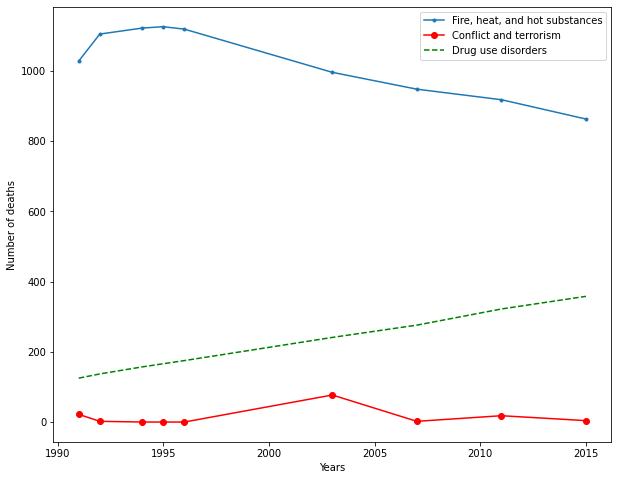

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))  # a  figure with a single Axes
ax.plot(data_morocco2['Year'],data_morocco2['Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)'],'.-',label="Fire, heat, and hot substances")
ax.plot(data_morocco2['Year'],data_morocco2['Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)'],'r-o',label="Conflict and terrorism")
ax.plot(data_morocco2['Year'],data_morocco2['Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)'],'g--',label="Drug use disorders")
#ax.plot(data_morocco2['Year'],data_morocco2['Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)'],label="Cardiovascular diseases")
plt.legend()
ax.set_xlabel('Years') 
ax.set_ylabel('Number of deaths')  